## 데이터 생성

In [2]:
import numpy as np
np.random.seed(42) # 다른 컴퓨터에서도 동일한 난수의 발생 순서를 보장

In [3]:
## 정답 데이터 생성
X=np.random.uniform(size=50)*5 #0~5 사이의 난수를 
y=0.65*X**3-4*X**2+3*X+3+np.random.normal(scale=0.6,size=50)

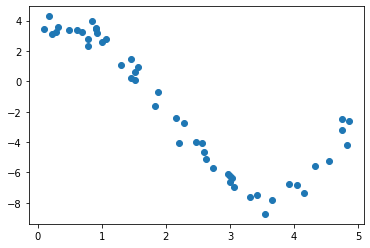

In [4]:
# 정답 데이터를 산점도로 출력
import matplotlib.pyplot as plt
plt.scatter(X,y)

## 데이터 쪼개기

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,shuffle=True) # 전체 데이터를 6:4 (훈련:테스트)

## 데이터 확인

In [6]:
print(f'X_train: {X_train.shape}') #f스트링, 문자열과 변수값을 합쳐서 사용
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')


X_train: (30,)
y_train: (30,)
X_test: (20,)
y_test: (20,)


## 훈련데이터와 테스팅데이터 그려보기

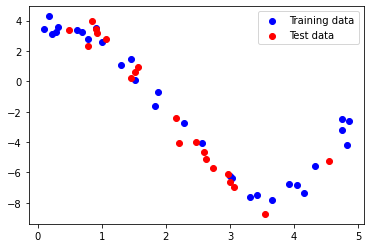

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## X,y 데이터를 X기준으로 모두 정렬
## 나중에 사용됨

# Sort the y_train and y_test arrays based on the sorted X_train and X_test arrays
y_train = y_train[np.argsort(X_train)] # [3,1,2] -> argsort -> [1,2,0]
y_test = y_test[np.argsort(X_test)]

# Sort the training and test arrays
X_train = np.sort(X_train)
X_test = np.sort(X_test)

# Plot the sorted training and test data
plt.scatter(X_train, y_train, c='blue', label='Training data')
plt.scatter(X_test, y_test, c='red', label='Test data')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# degree : 차수
# graph : 그래프 그릴지 여부 결정

def plot_regressor(degree, graph=True): 
    
    ## 모델 생성
    reg = LinearRegression()
    
    ## 데이터 변환
    poly = PolynomialFeatures(degree=degree,include_bias=False)    
    X_train_ = poly.fit_transform(X_train.reshape(-1,1)) # 데이터가 1차원이라 reshape 사용      
    
    ## 모델 학습    
    reg.fit(X_train_,y_train)
    
    ## 예측값
    y_pred_train = reg.predict(X_train_)
    
    ## 그래프 그리기
    if graph:
        plt.scatter(X_train,y_train,c='blue',label='training')
        plt.scatter(X_test,y_test,c='red',label='testing')    
        plt.plot(X_train,y_pred_train,color='blue') # 훈련데이터를 얼마나 잘 나타내는지 표현하기 위해 선형도 작성
        plt.legend()
    
    ## 트레이닝 데이터와 테스팅 데이터 각각의 MSE 계산
    X_test_ = poly.fit_transform(X_test.reshape(-1,1))
    y_pred_test = reg.predict(X_test_)
    train_mse = mean_squared_error(y_train,y_pred_train) # 훈련 데이터의 MSE
    test_mse = mean_squared_error(y_test,y_pred_test) # 테스팅 데이터의 MSE
    print(f'training MSE: {train_mse}')
    print(f'testing MSE:{test_mse}')
    
    return train_mse, test_mse
    
    
    

## 1차회귀

training MSE: 4.950933409839489
testing MSE:5.582050958972192


(4.950933409839489, 5.582050958972192)

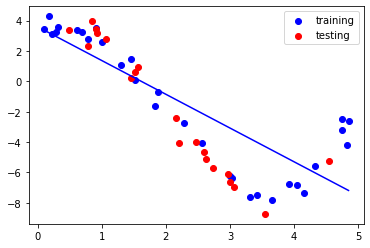

In [10]:
plot_regressor(1)

## 2차회귀

training MSE: 2.4379070558478313
testing MSE:2.4854161048873893


(2.4379070558478313, 2.4854161048873893)

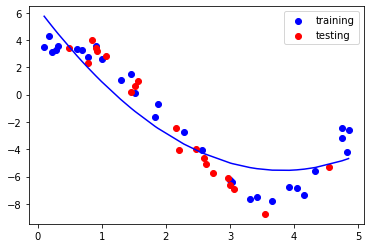

In [11]:
plot_regressor(2)

## 3차회귀

training MSE: 0.26779358828585476
testing MSE:0.38515042919296294


(0.26779358828585476, 0.38515042919296294)

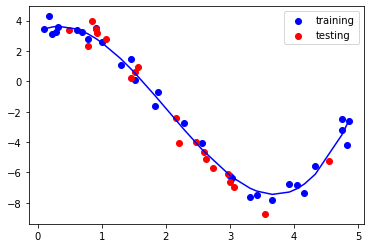

In [12]:
plot_regressor(3)

## 8차회귀

training MSE: 0.2124895792268226
testing MSE:0.4472938472996228


(0.2124895792268226, 0.4472938472996228)

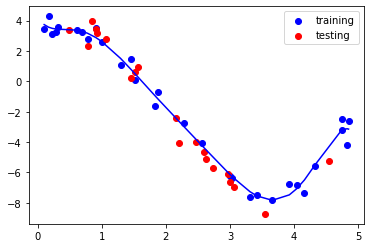

In [13]:
plot_regressor(8)

## 15차회귀

training MSE: 0.09989518458989624
testing MSE:1.9446676408637664


(0.09989518458989624, 1.9446676408637664)

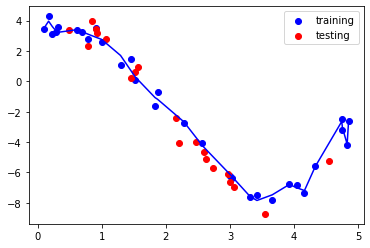

In [14]:
plot_regressor(15)

## 유연성을 변경시켜가며 mse 기록

==========1==========
training MSE: 4.950933409839489
testing MSE:5.582050958972192
==========2==========
training MSE: 2.4379070558478313
testing MSE:2.4854161048873893
==========3==========
training MSE: 0.26779358828585476
testing MSE:0.38515042919296294
==========4==========
training MSE: 0.2675859790661353
testing MSE:0.37867473404149543
==========5==========
training MSE: 0.2516303641745341
testing MSE:0.37335590316301637
==========6==========
training MSE: 0.2375903071581561
testing MSE:0.4306287570356907
==========7==========
training MSE: 0.21296092152107285
testing MSE:0.4477475116609441
==========8==========
training MSE: 0.2124895792268226
testing MSE:0.4472938472996228
==========9==========
training MSE: 0.2090173318174315
testing MSE:0.45629413274148645
==========10==========
training MSE: 0.18686163049153873
testing MSE:0.468851023359651
==========11==========
training MSE: 0.18672450820234354
testing MSE:0.47316899341115465
==========12==========
training MSE: 0.1861609

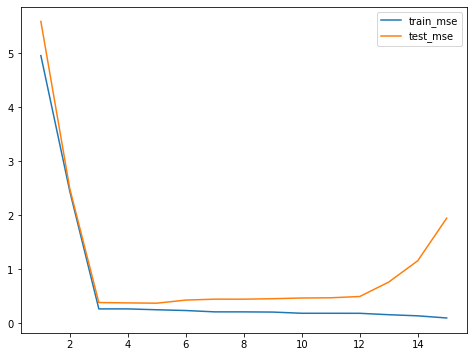

In [153]:
train_mse = []
test_mse = []
degrees = range(1,16)

for i in degrees:
    print("="*10+str(i)+"="*10)
    train, test = plot_regressor(i,graph=False)
    train_mse.append(train)
    test_mse.append(test)

plt.figure(figsize=(8,6))
plt.plot(degrees,train_mse, label = 'train_mse')
plt.plot(degrees,test_mse, label = 'test_mse')
plt.legend()
